In [ ]:
# We want to see wether there is a difference between the center of the sun and the barycenter
# this is time dependent

In [13]:
import numpy as np
import spiceypy
import datetime

spiceypy.furnsh("kernels/lsk/naif0012.tls")
spiceypy.furnsh("kernels/spk/de432s.bsp")
spiceypy.furnsh("kernels/pck/pck00010.tpc")

In [14]:
# set a start date for the beginning of this calculation
initial_time_utc = datetime.datetime(year=2000, month=1, day=1, hour=0, minute=0, second=0)

# the change over a course of 10.000 days
delta_days = 10000

# convert the deltadays into a date time format
end_time_utc = initial_time_utc + datetime.timedelta(days=delta_days)

# format it for spice
initial_time_utc_string = initial_time_utc.strftime("%Y-%m-%dT%H:%M:%S")
end_time_utc_string = end_time_utc.strftime("%Y-%m-%dT%H:%M:%S")

In [15]:
# spice formats it again for usage
initial_time_et = spiceypy.utc2et(initial_time_utc_string)
end_time_et = spiceypy.utc2et(end_time_utc_string)

# create an empty list to save to
ssb_to_sun_position = []

# returns the 10.000 steps from the initial time and the end time
time_interval_et = np.linspace(initial_time_et, end_time_et, delta_days)

# now we loop across the steps we compute the position vectors between the sun and the ssb
for time_stamp in time_interval_et:
    _position, _ = spiceypy.spkgps(targ=0, et=time_stamp, ref="ECLIPJ2000", obs=10)

    ssb_to_sun_position.append(_position)

ssb_to_sun_position = np.array(ssb_to_sun_position)

In [16]:
# normalize with the radius of the sun
# bodvcd takes the id of the terrestial body we want: the sun, the item we want which is the radius, which has three dimensions and thus we want three max numbers back
_, radii_sun = spiceypy.bodvcd(bodyid=10, item="RADII", maxn=3)

radius_sun = radii_sun[0]

# normalize the vectors
ssb_to_sun_position_scaled = ssb_to_sun_position / radii_sun

(-2.0, 2.0)

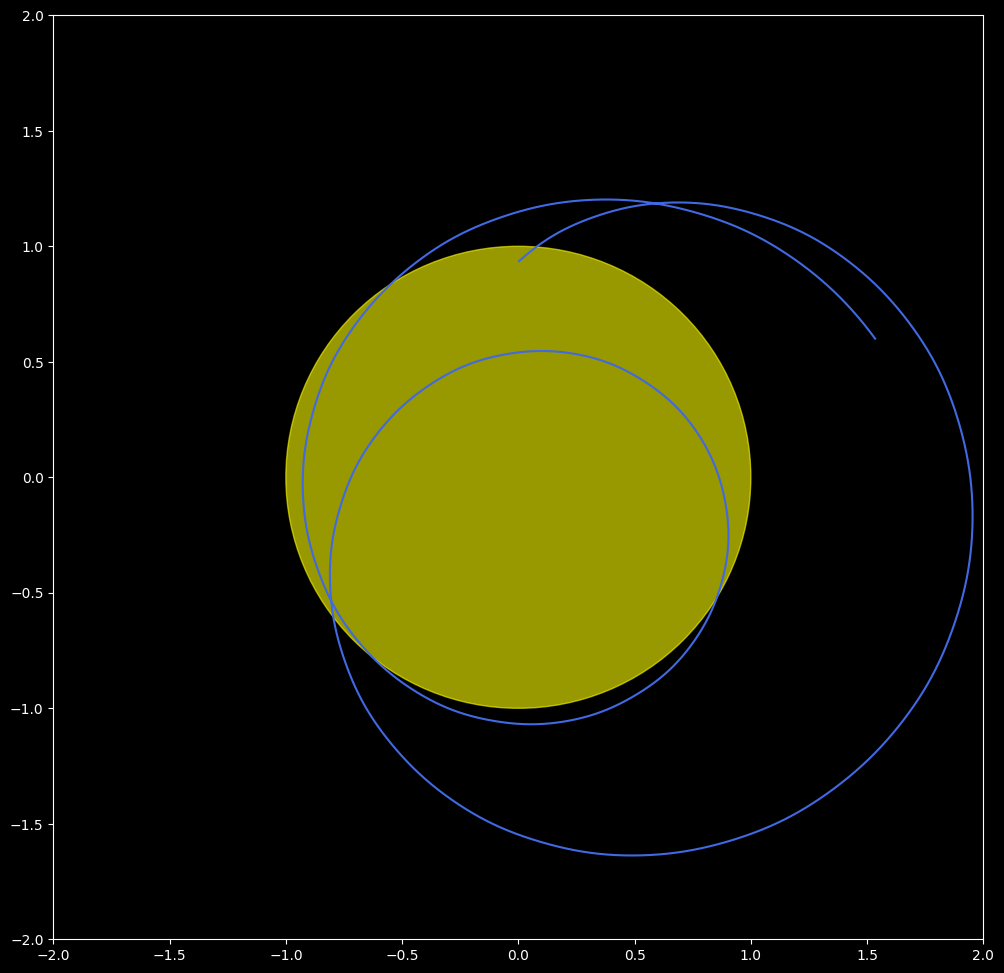

In [17]:
from matplotlib import pyplot as plt

# we only need the x and y vectors for the plot
ssb_to_sun_position_xy_coords = ssb_to_sun_position_scaled[:, 0:2]

# we dont want to be blinded by bright light
plt.style.use("dark_background")

# make a plot
fig, ax = plt.subplots(figsize=(12,12))

# now we add the found center
ax.plot(ssb_to_sun_position_xy_coords[:, 0], ssb_to_sun_position_xy_coords[:, 1], ls="solid", color="royalblue")

# create the sun and add it to the plot
sun = plt.Circle((0.0,0.0,0.0), 1.0, color="yellow", alpha=0.6)
ax.add_artist(sun)

# set limits so that the sun doesnt go out of bounds
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

In [18]:
# lets see how many days the bary center is outside of the sun
ssb_to_sun_position_scaled = np.linalg.norm(ssb_to_sun_position_scaled, axis=1)

ssb_outside_sun = len(np.where(ssb_to_sun_position_scaled > 1)[0])

6464